![StatModels](https://www.durhamtech.edu/themes/custom/durhamtech/images/durham-tech-logo-web.svg) 

## Applications - Statistical Modeling: Machine Learning

This lecture provides foundational knowledge and examples of machine learning modeling concepts by examining stock price data.  Here we are mostly focusing on classification models.

---

# Table of Contents

### Jupyter Overview
#### <a href='#1'>Useful Links</a>
#### <a href='#2'>Introduction to Jupyter Notebooks</a>
#### <a href='#3'>Cell Types</a>
* Markdown 
* Code
    1. Running One Cell
    2. Other Run Options

#### <a href='#4'>Tips and Tricks</a>

#### <a href='#55'>Weekly Readings/Videos</a>
#### <a href='#56'>Extra Practice</a>

## Introduction

### Our  predictive machine learning models perform two types of tasks:

* __CLASSIFICATION__:

LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Eg: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

* __REGRESSION__:

LABELS ARE CONTINUOUS VALUES.

Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

Eg: We train our model using income and expenditure data of bank customers using  __default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


<code style="background:yellow;color:black">...We are focusing today on classification models...</code>

![FunnyML](https://www.meme-arsenal.com/memes/11f11b5d16eef661677e4c9e989dd2b3.jpg) 

<a id='2'></a>
## Data Sources

1. SP 500 Components: https://datahub.io/core/s-and-p-500-companies
2. SP 500 Company Info: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
3. TD Ameritrade Data Dicitionary https://developer.tdameritrade.com/content/streaming-data#_Toc504640567
4. Yahoo Finance: https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC
5. Weather: https://www.weather.gov/wrh/climate?wfo=okx
6. FRED https://fred.stlouisfed.org/docs/api/fred/series.html

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from IPython.display import Image, display
import pydotplus

warnings.filterwarnings('ignore')

In [2]:
# Load in more columns?
yahoo_data=pd.read_csv('yahoo_data.csv', index_col=0)

# Or load in less columns that we dropped in Regression notebook?
#yahoo_data=pd.read_excel('yahoo_data2.xlsx', index_col=0)

yahoo_data

,open,close,prec,temp,DFF,UNRATE,GDPC1,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
252,0.000000,74.059998,2.31,31.2,3.50,5.5,3774.264,4.521944e+06,9.279823e+05,69.273452,3.238684,4.101602e+03,0.041550,83.449997
253,0.000000,74.300003,2.31,31.2,3.50,5.5,3774.264,4.524048e+06,9.268485e+05,69.318809,3.225283,4.007497e+03,0.041370,83.220001
254,0.000000,74.739998,2.31,31.2,3.50,5.5,3774.264,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,83.550003
255,0.000000,74.629997,2.31,31.2,3.50,5.5,3774.264,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,83.900002
256,0.000000,74.400002,2.31,31.2,3.50,5.5,3774.264,4.544563e+06,9.242278e+05,69.462897,3.185355,3.863518e+03,0.040868,84.290001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,3226.139893,3246.590088,3.94,68.8,0.09,7.8,18560.774,4.650244e+09,1.464733e+09,3092.189362,246.356374,6.489758e+06,0.868322,4455.479980
14546,3236.659912,3298.459961,3.94,68.8,0.09,7.8,18560.774,4.655326e+09,1.462315e+09,3093.227933,246.453794,6.358687e+06,0.872673,4443.109863
14547,3333.899902,3351.600098,3.94,68.8,0.09,7.8,18560.774,4.658163e+09,1.459933e+09,3094.501107,246.682806,6.127766e+06,0.881020,4352.629883
14548,3350.919922,3335.469971,3.94,68.8,0.09,7.8,18560.774,4.660950e+09,1.457891e+09,3096.047973,247.069186,5.926572e+06,0.892627,4359.459961


In [ ]:
# Summary statistics, rounded to 2 decimals places
yahoo_data.describe().round(2)

In [ ]:
# Look into the dataset characteristics, check for feature type - categorical or numerical.
yahoo_data.info()

## What is Machine Learning?



Technically, you have already created a Machine Learning model using our Regression model in the previous notebook!
    
## Create Our Functions

### Create tree model printer using pydotplus

### Split our data into train/test

In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Test set__.

Test data labels are predicted using the trained model and compared with the actual labels of the data.This gives us the idea about how well the model can be trusted for its predictive power.

* __Training set__ : The sample of data used to fit your model.

* __Test set__ : The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. 

![image.png](test_train.png)

* __Validation set__: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters

![image.png](validation.png)

### Use Sklearn to create many different models
* Regression
* SVM
* K nearest neighbors
* Tree models
* Neural Networks

In [3]:
def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

def data_split(df,y_var,scale=False):
    reg_df=df.copy()
    
    # train test split
    #y=reg_df.pop(y_var)
    #X=reg_df
    #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    
    # first 80% train
    x_train = reg_df.head(int(len(reg_df)*(0.8)))
    x_test = reg_df.iloc[max(x_train.index):]
    y_train = x_train.pop(y_var)
    y_test = x_test.pop(y_var)
    
    colz=x_train.columns
    
    if scale: 
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
    return x_train, x_test, y_train, y_test, colz
    
def random_forest(x_train, x_test, y_train, y_test, colz, cat=False, est=10):
    # If continous y variable
    random_forest = RandomForestRegressor(n_estimators=est)
    
    # If categorical y variable
    if cat:
        random_forest = RandomForestClassifier(n_estimators=est)
    
    random_forest.fit(x_train, y_train)
    train_acc = random_forest.score(x_train, y_train)
    test_acc = random_forest.score(x_test, y_test)
    
    y_pred = random_forest.predict(x_test)
    
    print('Random Forest Results:')
    
    print('Training acuracy= ',train_acc)
    print('Test accuracy= ',test_acc)

    features = x_train.columns
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)

    plt.subplots(figsize=(15, 11))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def cart(x_train, x_test, y_train, y_test, colz, cat=False, maxdepth=3, minsamples=5):
    # if continuous variable
    cart = DecisionTreeRegressor(random_state=12)
    if cat:
        cart = DecisionTreeClassifier(random_state=12,max_depth=maxdepth, min_samples_split=minsamples)
    cart.fit(x_train, y_train)
    train_acc = cart.score(x_train, y_train)
    test_acc = cart.score(x_test, y_test)
    
    y_pred = cart.predict(x_test)
    
    print('CART Results:')
    
    print('CART training acuracy= ',train_acc)
    print('CART test accuracy= ',test_acc)
    
    jupyter_graphviz(cart, filled=True, rounded=True, special_characters=True, feature_names=x_train.columns)
    
# https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53
def perceptron(x_train, x_test, y_train, y_test, colz):
    perceptron = Perceptron(max_iter=13)
    perceptron.fit(x_train, y_train)
    perceptron_train_acc = perceptron.score(x_train, y_train)
    perceptron_test_acc = perceptron.score(x_test, y_test)
    print ('perceptron training acuracy= ',perceptron_train_acc)
    print('perceptron test accuracy= ',perceptron_test_acc)
    
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
def logreg(x_train, x_test, y_train, y_test, colz):
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    logreg_train_acc = logreg.score(x_train, y_train)
    logreg_test_acc = logreg.score(x_test, y_test)
    print ('logreg training acuracy= ',logreg_train_acc)
    print('logreg test accuracy= ',logreg_test_acc)
    
def svm(x_train, x_test, y_train, y_test, colz):
    print("SVM results:")
    
    svc = SVC()                                                  
    svc.fit(x_train, y_train)                                    
    svc_train_acc = svc.score(x_train, y_train)
    svc_test_acc = svc.score(x_test, y_test)
    print ('SVM training acuracy= ',svc_train_acc)
    print('SVM test accuracy= ',svc_test_acc)
    
def knn(x_train, x_test, y_train, y_test, colz,neighbors=3):
    knn = KNeighborsClassifier(n_neighbors = neighbors)                  
    knn.fit(x_train, y_train)                                    
    knn_train_acc = knn.score(x_train, y_train)
    knn_test_acc = knn.score(x_test, y_test)
    print ('KNN training acuracy= ',knn_train_acc)
    print('KNN test accuracy= ',knn_test_acc)
    
# Initialize model constructor
def neural_netter(x_train, x_test, y_train, y_test, colz):
    inp_sh=np.array(x_train).shape[1]
    print("Neural Network results:")

    model = Sequential()
    # Add layers sequentially
    model.add(Dense(500, activation='relu', \
                        input_shape=(inp_sh,)))
    # Second
    model.add(Dense(250, activation='relu'))
    # Third
    model.add(Dense(250, activation='softmax'))
    # compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    # train the model
    NO_EPOCHS = 20
    history = model.fit(x_train, y_train,
                        batch_size=30,
                        epochs=NO_EPOCHS,
                        validation_split=0.2)

    yhat_probs = model.predict(x_test, verbose=0)
    yhat_classes = model.predict_classes(x_test, verbose=0)
    print("Test accuracy:",model.evaluate(x_test,y_test,verbose=0)[1])
    ConfusionMatrix=pd.DataFrame(confusion_matrix(y_test, yhat_classes),columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
    print ('Confusion matrix of test data is: \n',ConfusionMatrix)
    print("Average precision for the 2 classes is - ", precision_score(y_test, yhat_classes, average = None) )
    print("Average recall for the 2 classes is - ", recall_score(y_test, yhat_classes, average = None) )
    def plot_loss_acc(hist):
        f, ax = plt.subplots()
        ax.plot([None] + hist.history['acc'], 'o-')
        ax.plot([None] + hist.history['val_acc'], 'x-')
        # Plot legend and use the best location automatically: loc = 0.
        ax.legend(['Train acc', 'Validation acc'], loc = 0)
        ax.set_title('Training/Validation acc per Epoch')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Acc') 
        plt.plot()

        f, ax = plt.subplots()
        ax.plot([None] + hist.history['loss'], 'o-',c='r')
        ax.plot([None] + hist.history['val_loss'], 'x-',c='g')
        # Plot legend and use the best location automatically: loc = 0.
        ax.legend(['Train loss', 'Validation loss'], loc = 0)
        ax.set_title('Training/Validation loss per Epoch')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss') 
        plt.plot()
    plot_loss_acc(history)

In [4]:
# Create a classification for whether or not if you invested today then sold a year later 
# that you beat the average return for the S&P 500.  Success is measured as a 1, 
# failure is measured as a 0.
# https://www.investopedia.com/ask/answers/042415/what-average-annual-return-sp-500.asp

print("Average return in our dateset:",((yahoo_data.close_future-yahoo_data.close)/yahoo_data.close).mean())

yahoo_data['best']=np.where(((yahoo_data.close_future-yahoo_data.close)/yahoo_data.close) > .084, 1, 0)

# Create a close_moving into 3 evenly sized bins
#yahoo_data['close_moving']=pd.cut(yahoo_data['close_moving'],3,labels=[0,1,2])

# Correlation between close and open
print("Correlation between close and open:",yahoo_data['close'].corr(yahoo_data['open']))

Average return in our dateset: 0.0838424672928075
Correlation between close and open: 0.9988468861966869


In [5]:
# Delete duplicate columns (close is very similiar to open, close_future is going to be very similiar to best)
yahoo_data.drop(columns=['close','close_future'],inplace=True)
yahoo_data

,open,prec,temp,DFF,UNRATE,GDPC1,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,best
252,0.000000,2.31,31.2,3.50,5.5,3774.264,4.521944e+06,9.279823e+05,69.273452,3.238684,4.101602e+03,0.041550,1
253,0.000000,2.31,31.2,3.50,5.5,3774.264,4.524048e+06,9.268485e+05,69.318809,3.225283,4.007497e+03,0.041370,1
254,0.000000,2.31,31.2,3.50,5.5,3774.264,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,1
255,0.000000,2.31,31.2,3.50,5.5,3774.264,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,1
256,0.000000,2.31,31.2,3.50,5.5,3774.264,4.544563e+06,9.242278e+05,69.462897,3.185355,3.863518e+03,0.040868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,3226.139893,3.94,68.8,0.09,7.8,18560.774,4.650244e+09,1.464733e+09,3092.189362,246.356374,6.489758e+06,0.868322,1
14546,3236.659912,3.94,68.8,0.09,7.8,18560.774,4.655326e+09,1.462315e+09,3093.227933,246.453794,6.358687e+06,0.872673,1
14547,3333.899902,3.94,68.8,0.09,7.8,18560.774,4.658163e+09,1.459933e+09,3094.501107,246.682806,6.127766e+06,0.881020,1
14548,3350.919922,3.94,68.8,0.09,7.8,18560.774,4.660950e+09,1.457891e+09,3096.047973,247.069186,5.926572e+06,0.892627,1


In [6]:
# How many rows resulted in a good vs. bad one year later
target_count = yahoo_data['best'].value_counts()
yahoo_data['best'].value_counts()

1    7685
0    6613
Name: best, dtype: int64

In [7]:
# What is base line for prediction accuracy?
target_count[0]/(sum(target_count)) 

0.4625122394740523

In [8]:
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'best')

In [9]:
logreg(x_train, x_test, y_train, y_test, colz)

logreg training acuracy=  0.5119776184647665
logreg test accuracy=  0.6600229973169797


In [10]:
knn(x_train, x_test, y_train, y_test, colz,4)

KNN training acuracy=  0.9718482252141983
KNN test accuracy=  0.3878880797240322


CART Results:
CART training acuracy=  0.7755726525616367
CART test accuracy=  0.36719049444231505


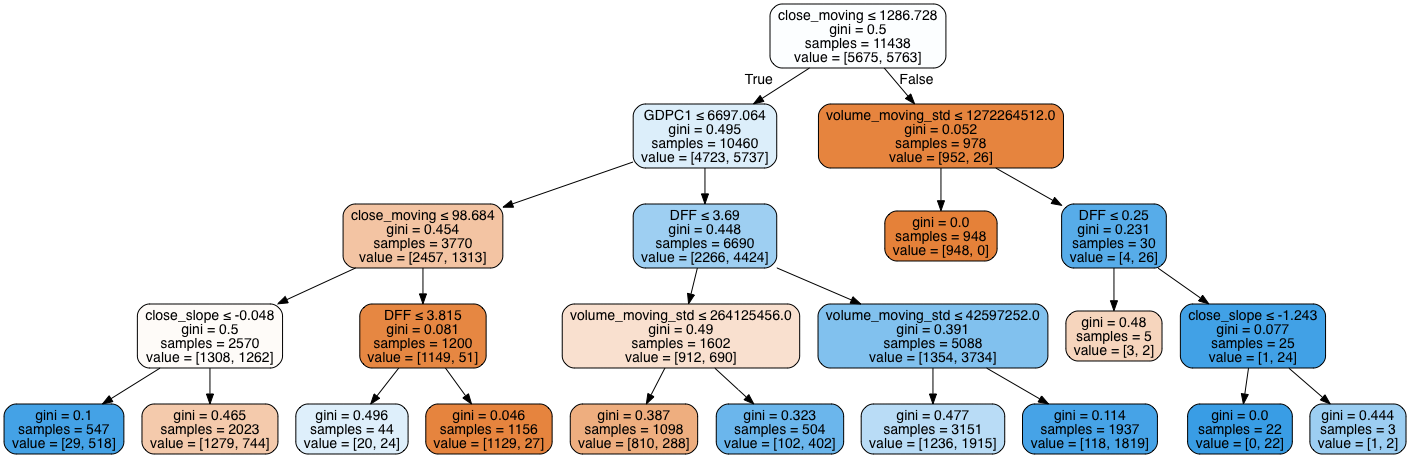

In [11]:
cart(x_train, x_test, y_train, y_test, colz, True, 4,10)

Random Forest Results:
Training acuracy=  0.9956286063997203
Test accuracy=  0.3415101571483327


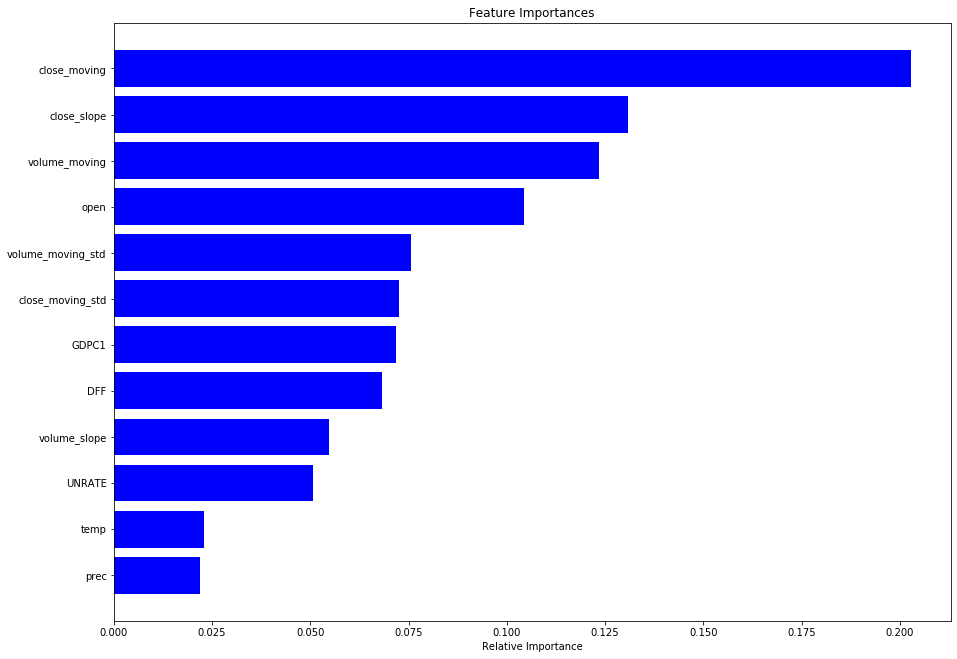

In [12]:
random_forest(x_train, x_test, y_train, y_test, colz, True, 5)

In [13]:
svm(x_train, x_test, y_train, y_test, colz)

SVM results:
SVM training acuracy=  0.6833362475957335
SVM test accuracy=  0.3779225756995017


In [14]:
perceptron(x_train, x_test, y_train, y_test, colz)

perceptron training acuracy=  0.5038468263682462
perceptron test accuracy=  0.6569566883863549


## Accuracy can be misleading!

Other measures of performance - Confusion matrix, Precision, Recall

# Confusion matrix 

### What is a confusion matrix?

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

![image.png](confusion.png)

### Precision 

Precision (P) is defined as the number of true positives (T_p) over the number of true positives plus the number of false positives (F_p)

![image.png](precision.png)

### Recall 

Recall (R) is defined as the number of true positives (T_p) over the number of true positives plus the number of false negatives (F_n)

![image.png](recall.png)

## Cleaning the model

We do not have any NA values in the dataset

- Use Pandas functions to remove na values, **Sklearn.preprocessing.Imputer** to impute the missing values.
- Scaling the variables using  **sklearn.preprocessing.StandardScaler**
    - The standard score of a sample x is calculated as:

        z = (x - u) / s
- Scaling using Sklearn Min Max scaler
  - X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    
    X_scaled = X_std * (max - min) + min

In [15]:
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'best',True)

Neural Network results:
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 9150 samples, validate on 2288 samples
Epoch 1/20
9150/9150 [==============================] - 4s 451us/sample - loss: 0.7489 - acc: 0.6922 - val_loss: 1.9066 - val_acc: 0.5122
Epoch 2/20
9150/9150 [==============================] - 4s 390us/sample - loss: 0.4475 - acc: 0.7922 - val_loss: 2.5171 - val_acc: 0.5573
Epoch 3/20
9150/9150 [==============================] - 3s 344us/sample - loss: 0.3768 - acc: 0.8395 - val_loss: 3.0440 - val_acc: 0.5848
Epoch 4/20
9150/9150 [==============================] - 3s 375us/sample - loss: 0.3303 - acc: 0.8671 - val_loss: 3.6612 - val_acc: 0.5909
Epoch 5/20
9150/9150 [==============================] - 3s 351us/sample - loss: 0.3086 - acc: 0.8729 - val_loss: 4.2287 - val_acc: 0.5393
Epoch 6/20
9150/9150 [==============================] - 3s 358us/sample - loss: 0.2785 - acc: 0.8886 - val_loss: 5.1196 

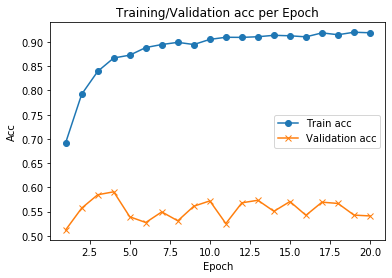

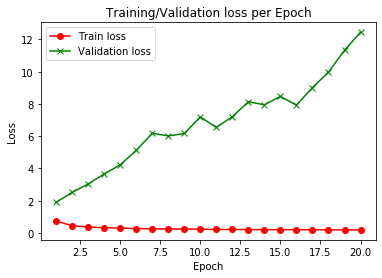

In [16]:
# Test model prediction accuracy using validation data 
# this gives you bias and variance error in the model.
neural_netter(x_train, x_test, y_train, y_test, colz)

<a id='55'></a>
# Weekly Readings/Videos

https://siebelm.github.io/Harry_Potter_1/

https://www.theverge.com/2017/12/12/16768582/harry-potter-ai-fanfiction

<a id='56'></a>
# Extra Practice